# ML 기초 실습 과제

## 문제설명
  - 이번 과제를 통해 여러분은 음식배달 서비스(배민, 쿠팡이츠 등)를 위한 예측모델을 만들게 될 것입니다!
  - 이 모델이 예측하는 값은 “음식배달에 걸리는 시간"입니다. 배달시간을 정확하게 예측하는 것은 사용자의 경험에 많은 영향을 미치게 됩니다.
  - 예측된 배달시간보다 실제 배달시간이 더 걸린 경우(under-prediction)가 반대의 경우(over-prediction)보다 두 배로 사용자의 경험에 안 좋은 영향을 준다고 알려져 있습니다.
  - 가능한 실제 배달시간과 가까운 값을 예측하되 동시에 under-prediction을 최소화하는 것이 좋은 예측모델입니다.

### 학습/테스트 데이터
  - 파일 “predict_delivery_time.txt”는 다음과 같은 속성들을 가지고 있습니다.
  - Restaurant, Location, Cuisines, AverageCost, MinimumOrder, Rating, Votes, Reviews 속성들을 모델의 입력속성으로 사용하세요.
  - 모델의 학습목표는 DeliveryTime입니다.
  - 이 데이터에서 랜덤하게 20%를 추출해서 테스트 데이터로 사용하고 나머지는 학습데이터로 사용하세요.

![image.png](image/1.png)

### 제출할 결과물
  - 간단한 요약문
  - 데이터 전처리와 속성 생성에 대한 간단한 설명
  - 학습을 위해서 어떤 모델을 사용했는지 그리고 어떠한 손실함수를 사용했는지를 간단히 설명
  - 테스트 데이터에 대한 평가지표들 (아래 두가지를 반드시 포함할 것)
  - Mean Absolute Error (MAE)
  - Under-prediction의 비율 (under-prediction 개수 / 테스트 데이터의 샘플수)
  - 모델 학습에 사용한 Jupyter notebook 파일

# 실습

## 데이터 준비 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
base_df = pd.read_csv('predict_delivery_time.csv')
base_df

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
0,ID6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12.0,4.0,30
1,ID2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11.0,4.0,30
2,ID1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99.0,30.0,65
3,ID5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176.0,95.0,30
4,ID6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521.0,235.0,65
...,...,...,...,...,...,...,...,...,...
11089,ID8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",250,50,4.2,326.0,189.0,30
11090,ID4620,"Sector 14, Noida",Fast Food,100,50,3.6,36.0,16.0,30
11091,ID3392,Majestic,"South Indian, Chinese, North Indian",100,50,3.5,45.0,18.0,30
11092,ID4115,"Sector 3, Marathalli",North Indian,100,50,3.1,24.0,9.0,30


### 테스트 데이터셋 분리하기

In [3]:
np.random.seed(32)

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(base_df, test_size=0.2, random_state=32)

In [5]:
train_copy = train_df.copy()

In [52]:
train_df

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
8879,ID5484,"Yerawada, Pune, Maharashtra",Chinese,150,50,3.5,34.0,3.0,30
10025,ID5454,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,150,50,3.8,19.0,11.0,30
2370,ID1140,Mumbai Central,"Burger, Fast Food, Beverages",200,99,3.7,1268.0,647.0,45
4673,ID889,"DBlock, Sector 63, Noida","Biryani, Mughlai, Hyderabadi, Desserts",300,99,3.9,516.0,201.0,120
6185,ID2286,Delhi UniversityGTB Nagar,"North Indian, Chinese",200,50,4.3,250.0,121.0,30
...,...,...,...,...,...,...,...,...,...
10328,ID4580,"Yerawada, Pune, Maharashtra","Chinese, North Indian",150,50,2.9,15.0,3.0,45
4030,ID7615,"Rmz Centennial, I Gate, Whitefield","Bakery, Desserts",200,50,NaN,NaN,NaN,30
9526,ID8497,"Nathan Road, Mangaldas Road, Pune","Ice Cream, Desserts, Bakery, Tea",200,50,4.0,36.0,22.0,30
9771,ID3215,"FTI College, Law College Road, Pune",Healthy Food,200,50,3.8,53.0,21.0,30


In [6]:
test_df

,Restaurant,Location,Cuisines,AverageCost,MinimumOrder,Rating,Votes,Reviews,DeliveryTime
1624,ID4449,"Delhi High Court, India Gate","North Indian, Chinese, Fast Food",150,50,2.9,83.0,35.0,45
1135,ID712,"Sandhurst Road, Mumbai CST Area","Fast Food, Lebanese, Beverages",100,50,NEW,NaN,NaN,30
8778,ID522,"FTI College, Law College Road, Pune","North Indian, Maharashtrian",100,50,3.5,27.0,7.0,30
8621,ID1071,Delhi UniversityGTB Nagar,"South Indian, North Indian, Continental, Chinese",200,50,3.5,551.0,75.0,45
10651,ID1251,"Sector 1, Noida",Fast Food,200,50,NaN,NaN,NaN,30
...,...,...,...,...,...,...,...,...,...
5378,ID7654,"Moulali, Kolkata","Cafe, Beverages",250,50,4.0,589.0,346.0,45
735,ID6444,"Rmz Centennial, I Gate, Whitefield","Street Food, Fast Food",100,50,3.8,280.0,76.0,45
5248,ID54,"Sandhurst Road, Mumbai CST Area","Ice Cream, Beverages",150,50,3.6,60.0,34.0,45
9447,ID4372,"Dockyard Road, Mumbai CST Area","Desserts, Beverages",100,50,3.2,4.0,2.0,30


## 데이터 훑어보기 

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8875 entries, 8879 to 10967
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    8875 non-null   object 
 1   Location      8875 non-null   object 
 2   Cuisines      8875 non-null   object 
 3   AverageCost   8875 non-null   object 
 4   MinimumOrder  8875 non-null   int64  
 5   Rating        7908 non-null   object 
 6   Votes         7209 non-null   float64
 7   Reviews       7022 non-null   float64
 8   DeliveryTime  8875 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 693.4+ KB


#### AverageCost Column 확인
  - 'for' 값 NaN으로 처리하기
  - 숫자형 자료로 변환하기

In [8]:
train_df['AverageCost'].value_counts()

200      2599
100      2035
150      1968
250       695
300       433
400       236
350       222
50        209
600       124
500        79
450        52
550        52
650        38
800        38
750        33
700        13
900        12
850        11
1,000      11
1,200       6
950         4
1,100       1
1,400       1
2,050       1
1,150       1
for         1
Name: AverageCost, dtype: int64

#### Rating Column 확인
  - NEW : 새로생긴 가게여서 아직 레이팅이 매겨지지 않은 상태
  - Opening Soon : 아직 개업하지 않은 상태
  - Temporarily Closed : 임시휴업 상태
  - 3 항목을 NaN으로 처리하기
  - 숫자형 자료로 변환하기

In [9]:
train_df['Rating'].value_counts()

3.7                   696
3.6                   671
3.5                   641
3.8                   626
NEW                   602
3.9                   591
3.4                   578
3.3                   531
4.0                   490
3.2                   425
4.1                   379
3.1                   326
3.0                   249
4.2                   216
4.3                   202
2.9                   163
2.8                   126
4.4                   113
2.7                    62
4.5                    59
2.6                    33
4.6                    33
4.7                    31
2.5                    22
2.4                    10
Opening Soon            9
4.8                     8
4.9                     7
2.3                     6
Temporarily Closed      1
2.1                     1
2.2                     1
Name: Rating, dtype: int64

### 숫자형 정보 요약

#### Describe

In [10]:
train_df.describe()

,MinimumOrder,Votes,Reviews,DeliveryTime
count,8875.000000,7209.000000,7022.000000,8875.000000
mean,53.434817,244.562907,124.258901,37.063099
std,19.078793,562.290962,327.547527,12.458969
min,0.000000,3.000000,1.000000,10.000000
25%,50.000000,19.000000,7.000000,30.000000
50%,50.000000,62.000000,26.000000,30.000000
75%,50.000000,211.000000,90.000000,45.000000
max,500.000000,9054.000000,6504.000000,120.000000


#### 히스토그램 

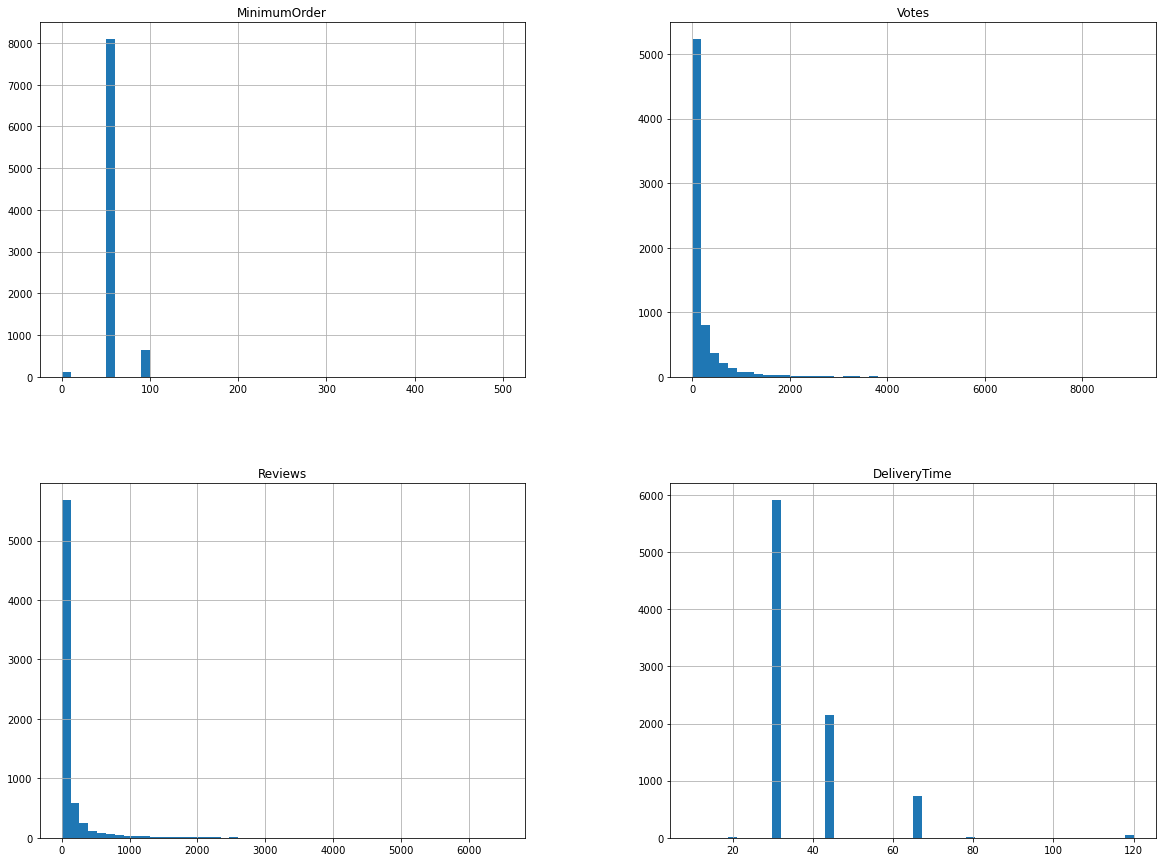

In [11]:
train_df.hist(bins=50, figsize=(20,15))

plt.show()

#### 상관계수 확인 

In [12]:
train_df.corr()

,MinimumOrder,Votes,Reviews,DeliveryTime
MinimumOrder,1.000000,0.126582,0.125373,0.258347
Votes,0.126582,1.000000,0.965128,0.201321
Reviews,0.125373,0.965128,1.000000,0.173577
DeliveryTime,0.258347,0.201321,0.173577,1.000000


### 나머지 데이터 살펴보기

#### Cuisines 

In [13]:
foods = []
for i in train_df['Cuisines'].unique() :
    foods.extend(i.split(', '))
    
print(set(foods))
print(len(set(foods)))

{'Hot dogs', 'Afghan', 'Belgian', 'Arabian', 'African', 'Vietnamese', 'Tamil', 'Mangalorean', 'South Indian', 'French', 'Tibetan', 'Cantonese', 'Odia', 'Chettinad', 'Kerala', 'Iranian', 'Japanese', 'Raw Meats', 'Biryani', 'Burmese', 'Assamese', 'Brazilian', 'Pizza', 'PokŽ', 'Ice Cream', 'Steak', 'Seafood', 'Italian', 'Spanish', 'BBQ', 'European', 'Gujarati', 'Korean', 'Awadhi', 'Desserts', 'Konkan', 'Naga', 'Mexican', 'Paan', 'Continental', 'Bangladeshi', 'Malwani', 'Street Food', 'Lucknowi', 'Goan', 'Sushi', 'Mediterranean', 'Chinese', 'North Indian', 'Mithai', 'TexMex', 'Tea', 'Thai', 'Kebab', 'Bubble Tea', 'Kashmiri', 'Parsi', 'Modern Indian', 'Coffee', 'Bohri', 'Bar Food', 'Bihari', 'Cafe', 'Sri Lankan', 'Middle Eastern', 'German', 'Maharashtrian', 'American', 'Fast Food', 'Lebanese', 'Bakery', 'Finger Food', 'Healthy Food', 'Hyderabadi', 'Rajasthani', 'Asian', 'Andhra', 'Turkish', 'Juices', 'Salad', 'Sandwich', 'Mishti', 'Indonesian', 'Nepalese', 'Israeli', 'North Eastern', 'Portu

#### Restaurant 

In [14]:
train_df['Restaurant'].value_counts()

ID4625    19
ID7184    18
ID7295    17
ID7544    14
ID5321    14
          ..
ID6271     1
ID3593     1
ID7670     1
ID4276     1
ID2090     1
Name: Restaurant, Length: 6390, dtype: int64

#### Location
  - Encoder를 통해 자료형 변환하기

In [15]:
train_df['Location'].value_counts()

Mico Layout, Stage 2, BTM Layout,Bangalore          766
DBlock, Sector 63, Noida                            663
Sector 1, Noida                                     653
FTI College, Law College Road, Pune                 459
Delhi UniversityGTB Nagar                           436
Sector 14, Noida                                    395
Rmz Centennial, I Gate, Whitefield                  388
Laxman Vihar Industrial Area, Sector 3A, Gurgoan    383
Mumbai Central                                      375
Delhi Administration Flats, Timarpur                370
Delhi High Court, India Gate                        326
MG Road, Pune                                       322
Sector 3, Marathalli                                293
Sandhurst Road, Mumbai CST Area                     287
Nathan Road, Mangaldas Road, Pune                   287
Majestic                                            265
Yerawada, Pune, Maharashtra                         251
Delhi Cantt.                                    

## Data Cleaning

#### Import Package

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

### AverageCost
  - `DataFrame.interpolate()` 적용

In [17]:
def averageCost_clean(X) :
    X['AverageCost'] = X['AverageCost'].str.replace(',', '')
    X['AverageCost'] = X['AverageCost'].apply(lambda x : x if x.isnumeric() else np.NaN)
    X['AverageCost'] = X['AverageCost'].astype(np.float64)
    X['AverageCost'] = X['AverageCost'].interpolate('pad')

### Rating
  - `DataFrame.interpolate()` 적용

In [18]:
def rating_clean(X) :
    X['Rating'] = X['Rating'].replace('NEW', np.NaN).replace('Opening Soon', np.NaN).replace('Temporarily Closed', np.NaN)
    X['Rating'] = X['Rating'].astype(np.float64)
    X['Rating'] = X['Rating'].interpolate('pad')

### Location
  - 비슷한 지명간에 비슷한 값을 갖도록 조정
  - ','가 포함된 지명의 순서를 뒤집어서 정렬
  - 딕셔너리와 map을 통한 데이터 변환
  

#### Location 별 DeliveryTime 요약

In [19]:
train_df.groupby('Location')['DeliveryTime'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
"Babarpur, New Delhi, Delhi",222.0,31.914414,6.150957,30.0,30.0,30.0,30.0,65.0
"Panjetan Colony, Malakpet, Hyderabad",45.0,33.000000,6.067799,30.0,30.0,30.0,30.0,45.0
"Tejas Nagar Colony, Wadala West, Mumbai",85.0,33.058824,6.730090,30.0,30.0,30.0,30.0,65.0
"Jaya Nagar, Saidabad, Hyderabad",35.0,33.714286,9.183013,30.0,30.0,30.0,30.0,65.0
"FTI College, Law College Road, Pune",459.0,34.041394,9.100148,30.0,30.0,30.0,30.0,120.0
"Noorkhan Bazaar, Malakpet, Hyderabad",49.0,34.081633,7.750905,30.0,30.0,30.0,30.0,65.0
"Chatta Bazaar, Malakpet, Hyderabad",45.0,34.111111,7.854420,30.0,30.0,30.0,30.0,65.0
"Musi Nagar, Malakpet, Hyderabad",44.0,34.318182,8.930670,30.0,30.0,30.0,30.0,65.0
"MG Road, Pune",322.0,35.062112,9.356018,30.0,30.0,30.0,45.0,65.0


#### 변환

In [20]:
def location_clean(X) :
    locations = X['Location'].values
    new_locations = []

    for l in locations :
        new_locations.append(', '.join(l.split(', ')[::-1]))
    
    X['Location'] = np.array(new_locations)
    locs = np.array(X.groupby('Location')['DeliveryTime'].describe().sort_values('mean').index)

    loc_dict = {}

    for i in range(len(locs)) :
        loc_dict[locs[i]] = i
        
    X['Location'] = X['Location'].map(loc_dict)

### Cuisines
  - `sklearn.feature_extraction.text.CountVectorizer` 사용

In [21]:
def cuisines_transform(X) :
    all_foods = base_df['Cuisines'].copy()
    all_foods = all_foods.str.replace(' ', '').str.split(',')
    all_foods_ = np.array([' '.join(x) for x in all_foods])
    
    foods = base_df['Cuisines'].copy()
    foods = foods.str.replace(' ', '').str.split(',')
    foods_ = np.array([' '.join(x) for x in foods])
    
    cu_enc = CountVectorizer()
    cu_enc.fit(all_foods_)
    cuisines_encoded = cu_enc.transform(foods_).toarray()
    
    cuisines_cv_df = pd.DataFrame(cuisines_encoded, columns=sorted(cu_enc.vocabulary_) ,index=foods.index)
    X = pd.concat([X, cuisines_cv_df], axis=1)
    X = X.dropna(axis=0)
    return X

### Votes, Reviews
  - 데이터셋을 Rating 기준으로 정렬
  - `DataFrame.interpolate()`를 적용

In [22]:
def votes_reviews_clean(X) :
    X[['Votes', 'Reviews']] = X.sort_values('Rating')[['Votes', 'Reviews']].interpolate('pad')

## 학습셋을 입력에 맞게 변환

### 데이터셋을 모델 입력 데이터셋 형태로 변환

In [23]:
def dataset_transform(X) :
    Xcopy = X.copy()
    averageCost_clean(Xcopy)
    rating_clean(Xcopy)
    votes_reviews_clean(Xcopy)
    location_clean(Xcopy)
    Xcopy = cuisines_transform(Xcopy)
    
    Xcopy = Xcopy.dropna(axis=0)
    y = Xcopy['DeliveryTime'].copy()
    Xcopy = Xcopy.drop(['Restaurant', 'Cuisines', 'DeliveryTime'], axis=1)
    
    return Xcopy, y

### 학습셋에서 목표 데이터 분리

In [24]:
train_prepared, Y = dataset_transform(train_df)

In [25]:
train_prepared.shape, Y.shape

((8875, 107), (8875,))

In [26]:
train_prepared

,Location,AverageCost,MinimumOrder,Rating,Votes,Reviews,afghan,african,american,andhra,...,streetfood,sushi,tamil,tea,texmex,thai,tibetan,turkish,vietnamese,wraps
0,4.0,200.0,50.0,3.5,12.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15.0,100.0,50.0,3.5,11.0,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,150.0,50.0,3.6,99.0,30.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,29.0,250.0,99.0,3.7,176.0,95.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.0,200.0,99.0,3.2,521.0,235.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,16.0,150.0,50.0,3.6,56.0,18.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11089,32.0,250.0,50.0,4.2,326.0,189.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11090,30.0,100.0,50.0,3.6,36.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11092,15.0,100.0,50.0,3.1,24.0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8875 entries, 0 to 11093
Columns: 107 entries, Location to wraps
dtypes: float64(6), int64(101)
memory usage: 7.3 MB


In [28]:
Y

0        30.0
1        30.0
2        65.0
3        30.0
4        65.0
         ... 
11088    30.0
11089    30.0
11090    30.0
11092    30.0
11093    30.0
Name: DeliveryTime, Length: 8875, dtype: float64

## 모델 학습
  - 선형회귀 모델
  - 랜덤 포레스트 모델

#### Import Package

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

### Linear Regression

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, Y)

LinearRegression()

### Random Forest

In [31]:
forest = RandomForestClassifier(n_estimators=30, random_state=32, criterion='entropy')
forest.fit(train_prepared, Y)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=32)

### Test

In [32]:
sample_data = train_df.iloc[:5]
sample_prepared, sample_goal = dataset_transform(sample_data)
sample_prepared.shape

(5, 107)

In [33]:
models = [lin_reg, forest]

print('Goal Pred :', sample_goal)
print()

for model in models :
    print('{} Pred\n{}'.format(model, model.predict(sample_prepared).round(decimals=0)))
    print()

Goal Pred : 2370      45.0
4673     120.0
6185      30.0
8879      30.0
10025     30.0
Name: DeliveryTime, dtype: float64

LinearRegression() Pred
[43. 48. 33. 32. 32.]

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=32) Pred
[ 45. 120.  30.  30.  30.]



## 모델 검증
  - `sklearn.model_selection.cross_val_score()` 을 통한 교차 검증

### Import Package

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Cross-Validation (교차 검증)

#### Linear Regression

In [36]:
lin_score = cross_val_score(lin_reg, train_prepared, Y, 
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_score)
display_scores(lin_rmse_scores)

Scores: [11.4878355  10.37769492 10.91353984 11.81660232 10.98560712 11.1935818
 11.68686357 12.72200682 12.67238164 12.00606435]
Mean: 11.586217787815928
Standard deviation: 0.7174151359822029


#### Random Forest

In [37]:
forest_score = cross_val_score(forest, train_prepared, Y, 
                            scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_score)
display_scores(forest_rmse_scores)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Scores: [11.87870378  9.99014154 10.90370422 11.47117421 10.37310712 10.95882424
 10.92920748 12.18978078 10.69986145 11.34550157]
Mean: 11.074000638314562
Standard deviation: 0.6319166095688389


## 모델 세부 조정
  - `sklearn.model_selection.RandomizedSearchCV()` 적용
  

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=100),
        'max_features' : randint(low=1, high=8)
    }

forest = RandomForestClassifier(random_state=32, criterion='entropy')
rnd_search = RandomizedSearchCV(forest, param_distributions=param_distribs,
                               n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=32)
rnd_search.fit(train_prepared, Y)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=32),
                   n_iter=50,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7808DD4F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7808DDAF0>},
                   random_state=32, scoring='neg_mean_squared_error')

In [39]:
rnd_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=6, n_estimators=91,
                       random_state=32)

In [40]:
cv_result = rnd_search.cv_results_
cv_result = pd.DataFrame([np.sqrt(-cv_result["mean_test_score"]), cv_result["param_n_estimators"], cv_result['param_max_features']]).T
cv_result.columns=['Mean Score', 'N-Estimators', 'Max Features']
cv_result.sort_values('Mean Score')

,Mean Score,N-Estimators,Max Features
18,11.175174,91.0,6.0
48,11.185630,71.0,7.0
4,11.186637,90.0,7.0
43,11.187392,80.0,6.0
20,11.199346,95.0,7.0
1,11.215683,63.0,7.0
45,11.244028,98.0,4.0
24,11.247284,75.0,3.0
10,11.257173,83.0,3.0
28,11.267178,94.0,4.0


### 특성 중요도

In [41]:
feature_importances = pd.concat([pd.Series(train_prepared.columns), pd.Series(rnd_search.best_estimator_.feature_importances_)], axis=1, )
feature_importances.columns=['Feature Name', 'Importance']
feature_importances.sort_values('Importance', ascending=False)[:10]

,Feature Name,Importance
4,Votes,0.183310
5,Reviews,0.162750
0,Location,0.121441
3,Rating,0.118006
1,AverageCost,0.082246
2,MinimumOrder,0.043209
37,fastfood,0.022270
32,chinese,0.017068
78,northindian,0.016316
14,bakery,0.014642


## 최종 평가

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

final_model = rnd_search.best_estimator_

x_test, y_test = dataset_transform(test_df)

y_pred = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)

final_mae = mean_absolute_error(y_test, y_pred)

In [50]:
final_rmse, final_mae

(10.77286076523536, 4.342045966651645)

In [44]:
f_result = pd.concat([pd.Series(y_test.values), pd.Series(y_pred)], axis=1)
f_result.columns=['Y_Test', 'Y_Pred']
f_result

,Y_Test,Y_Pred
0,30.0,30.0
1,30.0,30.0
2,30.0,30.0
3,45.0,65.0
4,30.0,30.0
...,...,...
2214,45.0,30.0
2215,30.0,30.0
2216,30.0,30.0
2217,30.0,30.0


In [45]:
f_result['Correct'] = f_result['Y_Test'] == f_result['Y_Pred']
f_result['Error'] = f_result['Y_Test'] - f_result['Y_Pred']
f_result['Under Pred'] = f_result['Y_Test'] > f_result['Y_Pred']
f_result

,Y_Test,Y_Pred,Correct,Error,Under Pred
0,30.0,30.0,True,0.0,False
1,30.0,30.0,True,0.0,False
2,30.0,30.0,True,0.0,False
3,45.0,65.0,False,-20.0,False
4,30.0,30.0,True,0.0,False
...,...,...,...,...,...
2214,45.0,30.0,False,15.0,True
2215,30.0,30.0,True,0.0,False
2216,30.0,30.0,True,0.0,False
2217,30.0,30.0,True,0.0,False


In [46]:
df_size = len(f_result)
result_success = f_result.groupby('Correct')['Error'].count().values[1]
result_fail = len(f_result) - result_success
result_ratio = result_success / df_size

In [47]:
under_count = f_result['Under Pred'].value_counts()[1]
under_ratio = under_count / df_size

In [48]:
print('Under-Prediction Ratio : {} %'.format((under_ratio * 100).round(2)))

Under-Prediction Ratio : 18.03 %
